### Cropping noise to the maximum window calculated from electrons and muons

To include the noise as a third class, we need to crop the files of the noise so the three classes have the same shape to feed the neural network. As all the noise files we already cropped and they are inside `cropped_electrons2`, we will select the noise and move it to a new directory called `cropped_noise2`

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

We will selected the noise stored in the electron files:

In [2]:
path = '/gpfs/res_scratch/damic/TFM_DM/CCDimg_fullNoise'
num_files = len(glob.glob1(path,"*.npz"))
print('En total tenemos', num_files,'files')

num_electrons = len(glob.glob1(path,"*11.npz"))
num_alphas = len(glob.glob1(path,"*1000020040.npz"))
num_muons = len(glob.glob1(path,"*13.npz"))

print('Hay',num_electrons,'electrones,',num_alphas,'alphas y ', num_muons, 'muones')

En total tenemos 18277 files
Hay 5835 electrones, 7218 alphas y  5224 muones


In [7]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/gpfs/projects/damic/eVSmu_2def'

In [11]:
# The directory where we will store our dataset with the cropped images
base_dir = '/gpfs/projects/damic/cropped_noise2'
os.mkdir(base_dir)

In [12]:
#destination directory 
dest = base_dir

#selecting electrons
files = glob.glob1(original_dataset_dir,"*11.npz")

for index, file in enumerate(files):
    
    #loading each image as a numpy array
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']

    #copying to the 'cropped_noise2' directory
    np.savez(os.path.join(dest, file), energy=noise_a)

Text(0.5, 1.0, 'Electron noise')

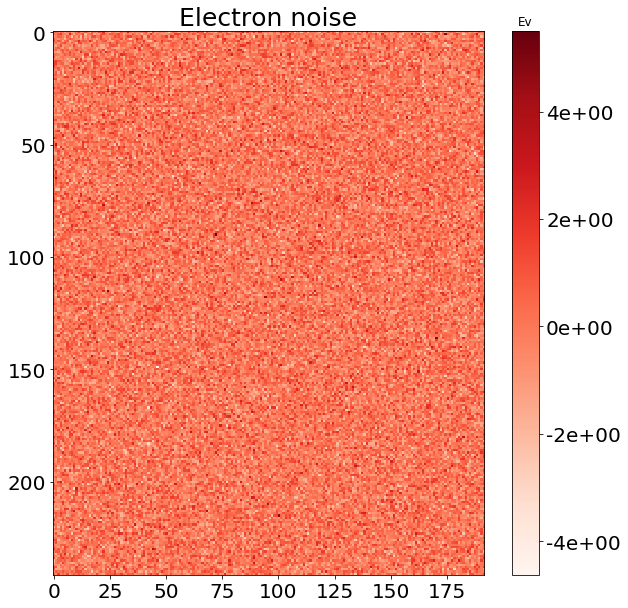

In [14]:
files = os.listdir(dest)
f=76
noise = np.load(os.path.join(dest, files[f]))['energy']

fig_n = plt.figure(figsize=(10,10))
plt.imshow(noise, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron noise", fontsize = 25)

In [16]:
i = 0
for filename in os.listdir(dest):
    os.rename(os.path.join(dest,filename), os.path.join(dest,'noise_file_from_e'+str(i)+'-0.npz'))
    i = i +1

In [19]:
files = os.listdir(dest)
files[f]

'noise_file_from_e2033-0.npz'